# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd

In [13]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [7]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [14]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [15]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


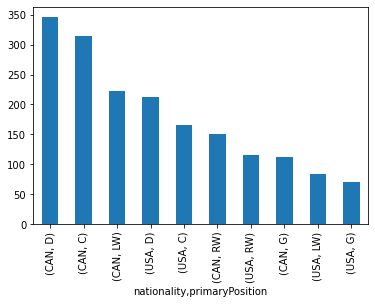

In [49]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

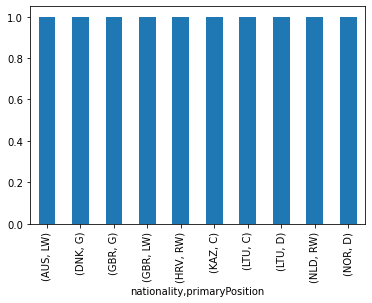

In [50]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values()[:10].plot(kind='bar')

In [78]:
table = player_info.groupby(['nationality'])['primaryPosition'].value_counts().to_frame()

In [79]:
table = table.unstack()

In [80]:
table.fillna(0, inplace=True)

In [89]:
table.rename(columns={'primaryPosition':'num_jogadores'}, inplace=True)

In [96]:
table

num_jogadores                            
primaryPosition             C      D      G     LW     RW
nationality                                              
AUS                       0.0    0.0    0.0    1.0    0.0
AUT                       0.0    0.0    0.0    2.0    2.0
BHS                       1.0    0.0    0.0    0.0    0.0
BLR                       1.0    3.0    0.0    2.0    0.0
CAN                     314.0  346.0  113.0  223.0  150.0
CHE                       4.0    9.0    3.0    2.0    6.0
CZE                      20.0   30.0   13.0   10.0   23.0
DEU                       6.0    4.0    5.0    3.0    2.0
DNK                       4.0    2.0    1.0    2.0    5.0
FIN                      21.0   25.0   20.0   19.0   15.0
FRA                       2.0    2.0    0.0    2.0    0.0
GBR                       0.0    0.0    1.0    1.0    0.0
HRV                       0.0    0.0    0.0    0.0    1.0
KAZ                       1.0    0.0    0.0    0.0    0.0
LTU                       1.0    1.0    0.0    0.0    0.0
LVA                       2.0    3.0    2.0    4.0    0.0
NGA                       0.0    0.0    0.0    0.0    1.0
NLD                       0.0    0.0    0.0    0.0    1.0
NOR                       0.0    1.0    0.0    1.0    1.0
RUS                      19.0   30.0   11.0   16.0   23.0
SVK                       5.0    9.0    2.0    4.0    5.0
SVN                       1.0    0.0    0.0    1.0    0.0
SWE                      43.0   65.0   22.0   34.0   20.0
UKR                       0.0    1.0    0.0    2.0    0.0
USA                     165.0  212.0   71.0   83.0  116.0